In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Property_Sales_History_Property_Sales_History.csv')

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_2524\1892628201.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Property_Sales_History_Property_Sales_History.csv')


In [3]:
df

,PARCELNO,PROPCLASS,PROPADDR,SALEDATE,SALEPRICE,SALENO,GRANTEE,GRANTOR,SalesInstr,PROPNO,PROPDIR,PROPSTR,PROPZIP,SALETERMS
0,22123947.,401,NaN,03/02/2016,$1.00,1,"HALL, EDWARD","LAURA, TRINA",QC,18624,NaN,WINSTON,48219,REVIEW NEEDED
1,21015633.010,401,NaN,03/02/2016,$5000.00,1,"ANDERSON, ANTONIO","WARE, EDISON",QC,18694,NaN,ALCOY,48205,REVIEW NEEDED
2,17007012.,404,NaN,03/02/2016,NaN,1,NaN,"HASKA, WILLIAM",WD,2130,NaN,IROQUOIS,48214,REVIEW NEEDED
3,21042739.,401,NaN,03/02/2016,$1.00,1,"HERBERT, WILLIE JR","HERBERT, CLARA L",PTA,3960,NaN,LILLIBRIDGE,48214,NQ
4,21077568-9,401,NaN,03/02/2016,$4400.00,1,"MASON, CHARLES ANTHONY","MUMPHORD, TAHNIA",PTA,5036,NaN,MARSEILLES,48224,REVIEW NEEDED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601993,22107119.006,461,"20830 N\nPIERSON, CT\n(38.74959, -94.80862)",05/19/2004,$73267.00,1,FEDERAL NATL MORTGAGE ASSOC,"COPELAND, ARTHUR",SD,20830,N,PIERSON CT,48228,BANK SALE
601994,21052045-7,403,"621 N\nPIPER, CT\n(38.04312, -78.4676)",02/01/1995,$192500.00,1,NaN,NaN,WD,621,N,PIPER CT,48215,REVIEW NEEDED
601995,22107119.032,401,"20727 S\nPIERSON, CT\n(39.006224, -94.825893)",07/01/1994,$29500.00,1,NaN,NaN,WD,20727,S,PIERSON CT,48228,ARMS LENGTH
601996,21051952-3,403,"530 S\nPIPER, CT\n(40.14511, -76.60256)",07/26/2002,$284000.00,1,WARREN AND JANICE SYLVERTOOTH,MICHAEL L BAKER,PTA,530,S,PIPER CT,48215,ARMS LENGTH


In [4]:
#the SALEPRICE here is in string and has "$" prefix. so first replacing "$" with empty space
df['SALEPRICE'] = df['SALEPRICE'].str.replace('$', '')

#now typecasting the string to float
df['SALEPRICE'] = df['SALEPRICE'].astype(float)

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_2524\533734603.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['SALEPRICE'] = df['SALEPRICE'].str.replace('$', '')


In [5]:
#filling the null values using the interpolate method(try using other methods like linear, quadratic instead of cubic)
df['SALEPRICE'].interpolate(method='cubic', inplace=True)
df2 = df[['SALEDATE','SALEPRICE']]
df2

,SALEDATE,SALEPRICE
0,03/02/2016,1.000000
1,03/02/2016,5000.000000
2,03/02/2016,7495.056193
3,03/02/2016,1.000000
4,03/02/2016,4400.000000
...,...,...
601993,05/19/2004,73267.000000
601994,02/01/1995,192500.000000
601995,07/01/1994,29500.000000
601996,07/26/2002,284000.000000


In [6]:
#grouping the data based upon dates and adding all the SALEPRICE of the single date
grouped_df = df.groupby(['SALEDATE'])['SALEPRICE'].sum()
grouped_df

SALEDATE
01/01/1990    2.773971e+07
01/01/1991    2.542065e+07
01/01/1992    2.256761e+07
01/01/1993    2.357300e+07
01/01/1994    2.783119e+07
                  ...     
12/31/2011    2.568447e+06
12/31/2012    3.739879e+07
12/31/2013    2.401792e+07
12/31/2014    1.406747e+08
12/31/2015    9.544724e+05
Name: SALEPRICE, Length: 7758, dtype: float64

In [7]:
#resetting the index
grouped_df = grouped_df.reset_index()
grouped_df

,SALEDATE,SALEPRICE
0,01/01/1990,2.773971e+07
1,01/01/1991,2.542065e+07
2,01/01/1992,2.256761e+07
3,01/01/1993,2.357300e+07
4,01/01/1994,2.783119e+07
...,...,...
7753,12/31/2011,2.568447e+06
7754,12/31/2012,3.739879e+07
7755,12/31/2013,2.401792e+07
7756,12/31/2014,1.406747e+08


In [8]:
#looking out for maximum SALEPRICE value present in the dataframe 
max_value = df['SALEPRICE'].max()
print(max_value)

4629338150.227232


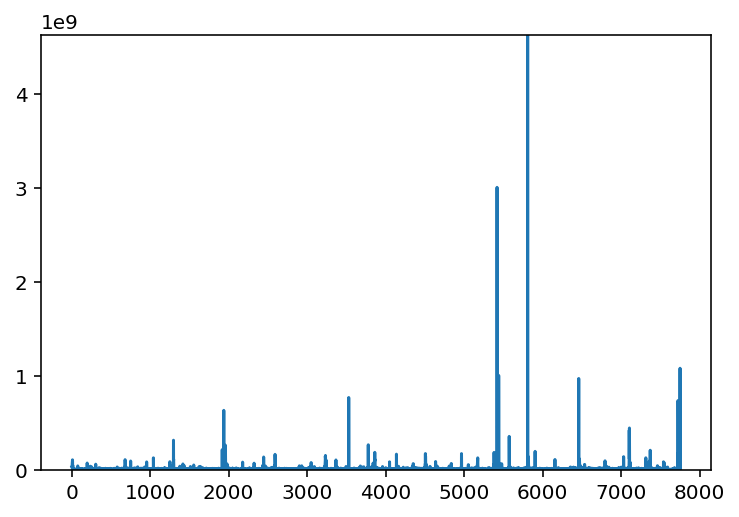

In [9]:
#to enhanse the quality of the graph
%config InlineBackend.figure_format = 'retina'

#max and min value range of y axis
plt.ylim(0.00, max_value)


#plotting of the graph
plt.plot(grouped_df.index,grouped_df['SALEPRICE'])